<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-10-04 23:34:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  70.0MB/s    in 2.2s    

2025-10-04 23:34:27 (70.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



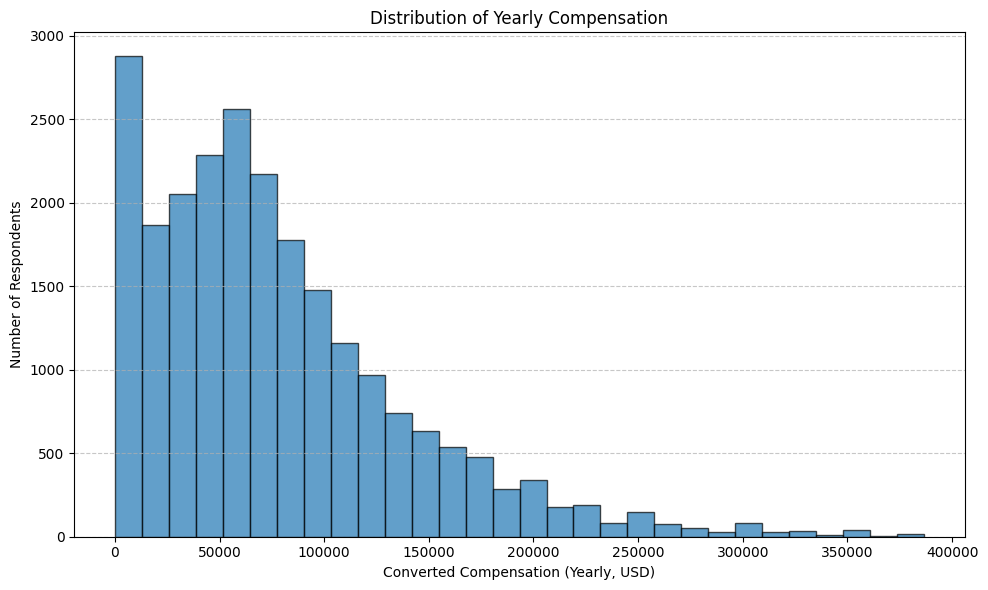

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing or extreme values
df_comp = df.dropna(subset=['ConvertedCompYearly'])
df_comp = df_comp[df_comp['ConvertedCompYearly'] < df_comp['ConvertedCompYearly'].quantile(0.99)]  # remove top 1% outliers

# Step 2: Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_comp['ConvertedCompYearly'], bins=30, color='#1f77b4', edgecolor='black', alpha=0.7)
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Converted Compensation (Yearly, USD)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



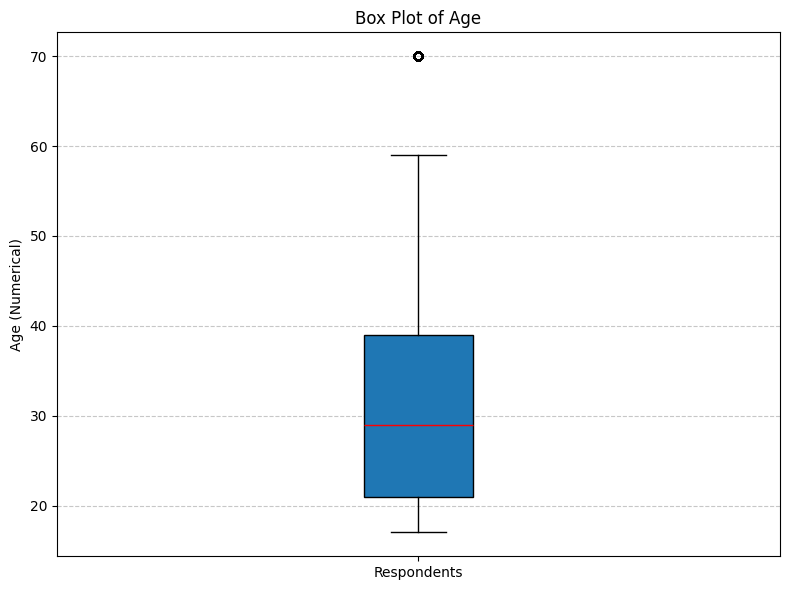

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing age values
df_age = df.dropna(subset=['Age'])

# Step 2: Map categorical age groups to numerical midpoints
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}
df_age['AgeNumeric'] = df_age['Age'].map(age_map)

# Step 3: Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_age['AgeNumeric'].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='#1f77b4', color='black'),
            medianprops=dict(color='red'))
plt.title('Box Plot of Age')
plt.ylabel('Age (Numerical)')
plt.xticks([1], ['Respondents'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



/tmp/ipykernel_643/2265726228.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scatter['Age_numeric'] = df_scatter['Age'].map(age_map)


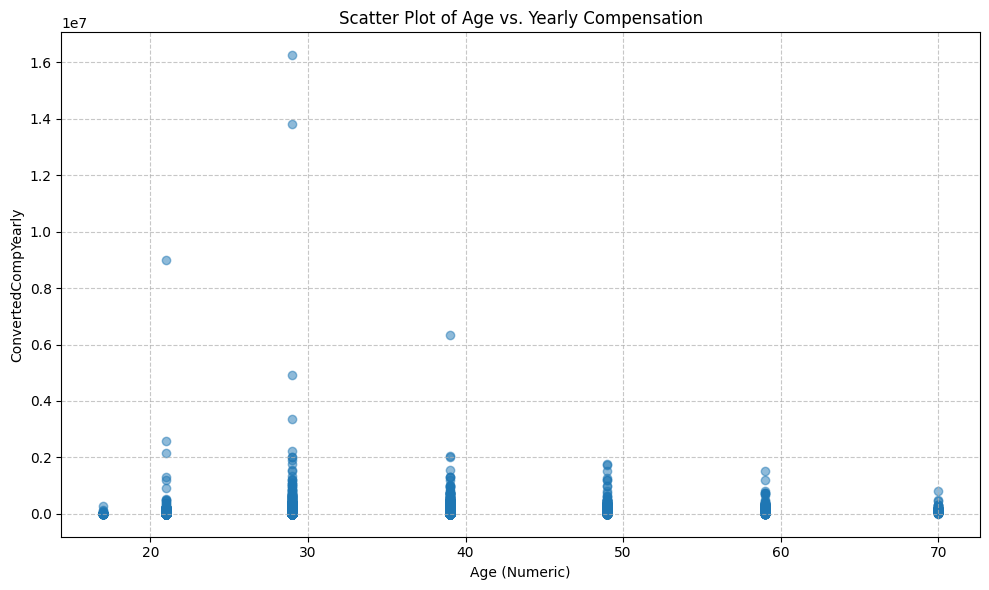

In [6]:
import matplotlib.pyplot as plt

# Step 1: Drop missing values in Age or ConvertedCompYearly
df_scatter = df.dropna(subset=['Age', 'ConvertedCompYearly'])

# Step 2: Map Age to numeric midpoints (same as before)
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}
df_scatter['Age_numeric'] = df_scatter['Age'].map(age_map)

# Step 3: Plot scatter chart
plt.figure(figsize=(10, 6))
plt.scatter(df_scatter['Age_numeric'], df_scatter['ConvertedCompYearly'], alpha=0.5, color='#1f77b4')
plt.title('Scatter Plot of Age vs. Yearly Compensation')
plt.xlabel('Age (Numeric)')
plt.ylabel('ConvertedCompYearly')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


/tmp/ipykernel_643/641985349.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bubble['Age_numeric'] = df_bubble['Age'].map(age_map)


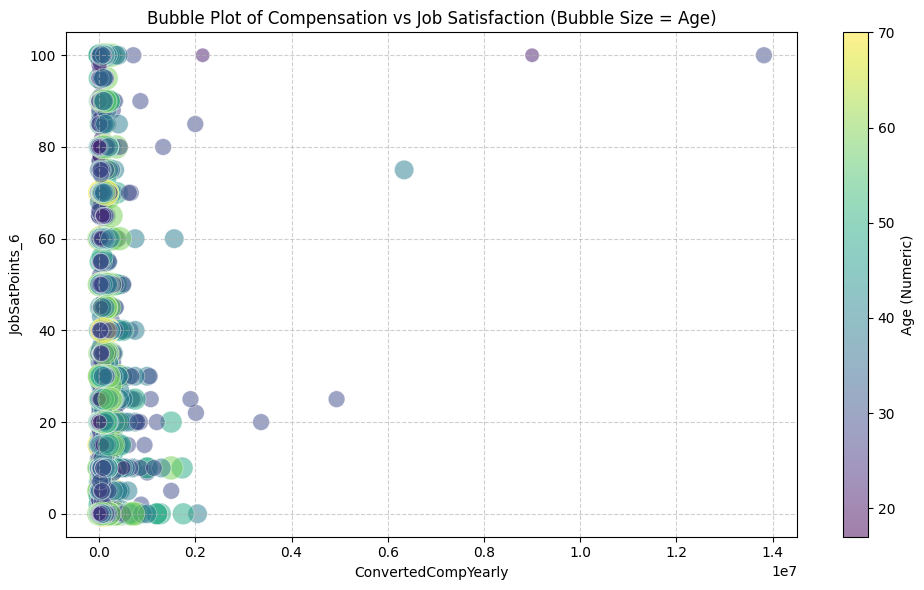

In [7]:
import matplotlib.pyplot as plt

# Step 1: Drop missing values for relevant columns
df_bubble = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age'])

# Step 2: Map Age to numeric midpoints
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}
df_bubble['Age_numeric'] = df_bubble['Age'].map(age_map)

# Step 3: Normalize bubble sizes (to make them visually proportional)
bubble_size = df_bubble['Age_numeric'] * 5  # Adjust multiplier if needed

# Step 4: Create bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSatPoints_6'],
    s=bubble_size,         # bubble size
    alpha=0.5,
    c=df_bubble['Age_numeric'],  # color by age
    cmap='viridis',
    edgecolors='w',
    linewidths=0.5
)
plt.title('Bubble Plot of Compensation vs Job Satisfaction (Bubble Size = Age)')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('JobSatPoints_6')
plt.colorbar(label='Age (Numeric)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



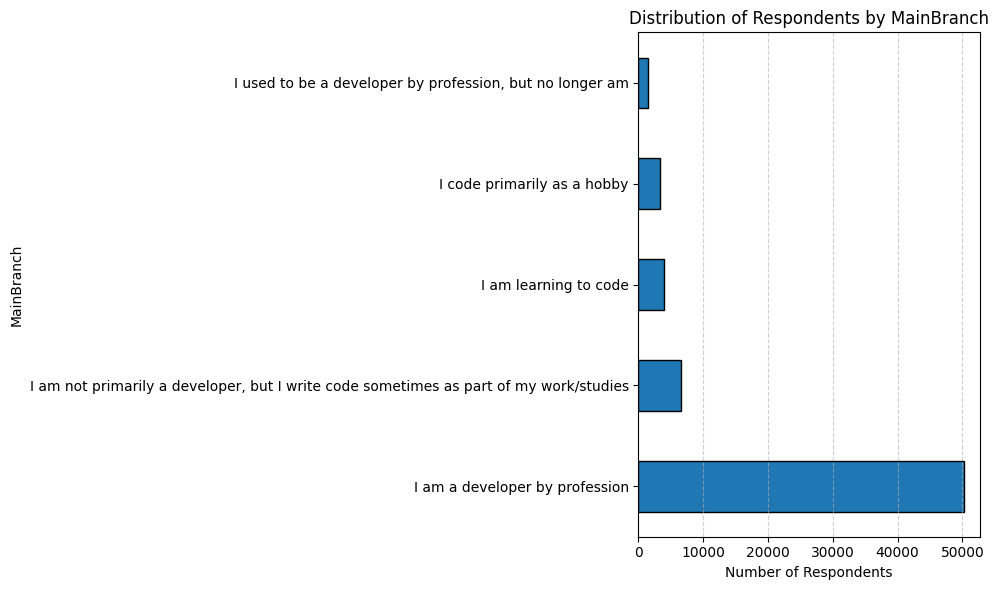

In [8]:
import matplotlib.pyplot as plt

# Step 1: Drop missing values
df_branch = df.dropna(subset=['MainBranch'])

# Step 2: Count frequency of each MainBranch category
branch_counts = df_branch['MainBranch'].value_counts()

# Step 3: Plot horizontal bar chart
plt.figure(figsize=(10, 6))
branch_counts.plot(kind='barh', color='#1f77b4', edgecolor='black')
plt.title('Distribution of Respondents by MainBranch')
plt.xlabel('Number of Respondents')
plt.ylabel('MainBranch')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



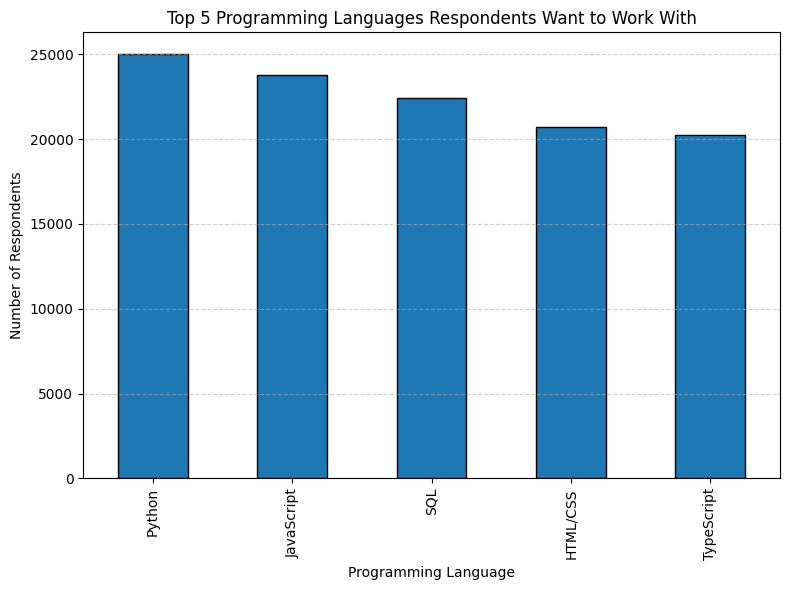

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing values
df_lang = df.dropna(subset=['LanguageWantToWorkWith'])

# Step 2: Split semicolon-separated values into separate rows
df_lang_split = df_lang.assign(LanguageWantToWorkWith=df_lang['LanguageWantToWorkWith'].str.split(';')).explode('LanguageWantToWorkWith')

# Step 3: Strip extra spaces
df_lang_split['LanguageWantToWorkWith'] = df_lang_split['LanguageWantToWorkWith'].str.strip()

# Step 4: Count frequency of each language
lang_counts = df_lang_split['LanguageWantToWorkWith'].value_counts().head(5)

# Step 5: Plot vertical bar chart
plt.figure(figsize=(8, 6))
lang_counts.plot(kind='bar', color='#1f77b4', edgecolor='black')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


/tmp/ipykernel_643/699961054.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_js['Age'] = pd.Categorical(df_age_js['Age'], categories=age_order, ordered=True)
/tmp/ipykernel_643/699961054.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_js = df_age_js.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna()


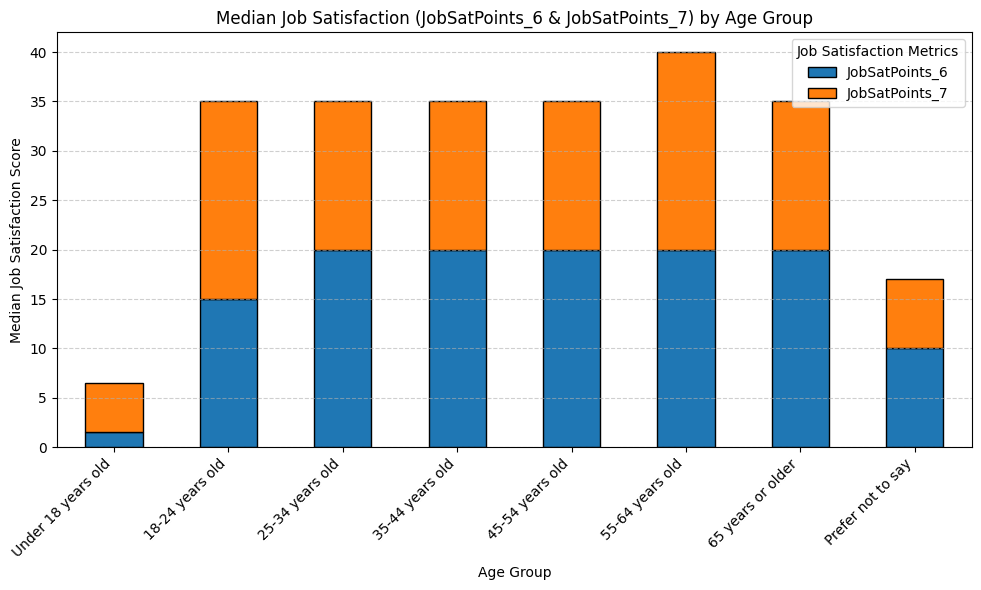

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing values for relevant columns
df_age_js = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Step 2: Define an ordered age mapping for sorting (since Age is categorical)
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old',
             '35-44 years old', '45-54 years old', '55-64 years old',
             '65 years or older', 'Prefer not to say']
df_age_js['Age'] = pd.Categorical(df_age_js['Age'], categories=age_order, ordered=True)

# Step 3: Group by Age and compute median values
median_js = df_age_js.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna()

# Step 4: Plot stacked bar chart
median_js.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'], edgecolor='black')

plt.title('Median Job Satisfaction (JobSatPoints_6 & JobSatPoints_7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Score')
plt.legend(title='Job Satisfaction Metrics')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



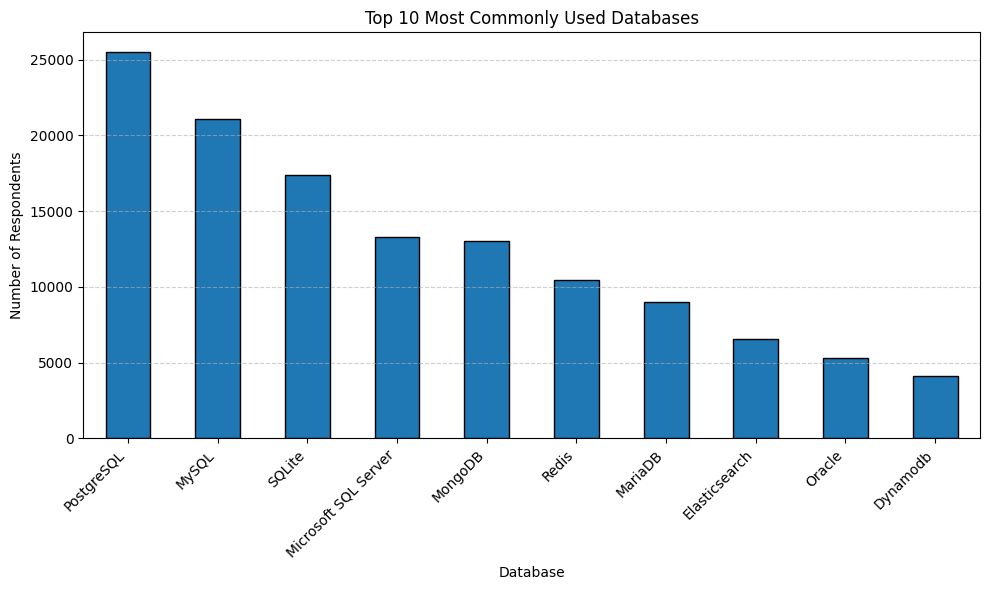

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing values in the column
df_db = df.dropna(subset=['DatabaseHaveWorkedWith'])

# Step 2: Split semicolon-separated values into individual rows
df_db_split = df_db.assign(DatabaseHaveWorkedWith=df_db['DatabaseHaveWorkedWith'].str.split(';')).explode('DatabaseHaveWorkedWith')

# Step 3: Clean up extra spaces
df_db_split['DatabaseHaveWorkedWith'] = df_db_split['DatabaseHaveWorkedWith'].str.strip()

# Step 4: Count database frequencies
db_counts = df_db_split['DatabaseHaveWorkedWith'].value_counts().head(10)  # top 10 for clarity

# Step 5: Plot bar chart
plt.figure(figsize=(10, 6))
db_counts.plot(kind='bar', color='#1f77b4', edgecolor='black')

plt.title('Top 10 Most Commonly Used Databases')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_643/477138206.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_comp['Age'] = pd.Categorical(df_age_comp['Age'], categories=age_order, ordered=True)
/tmp/ipykernel_643/477138206.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_comp = df_age_comp.groupby('Age')['ConvertedCompYearly'].median().dropna()


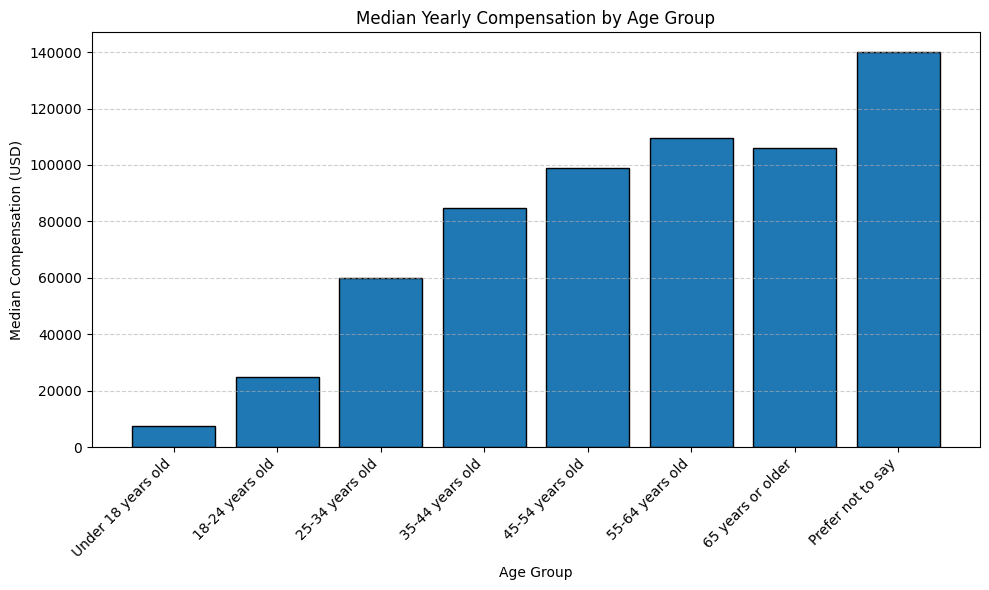

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing values for compensation and age
df_age_comp = df.dropna(subset=['Age', 'ConvertedCompYearly'])

# Step 2: Define age order (since it's categorical)
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old',
             '35-44 years old', '45-54 years old', '55-64 years old',
             '65 years or older', 'Prefer not to say']
df_age_comp['Age'] = pd.Categorical(df_age_comp['Age'], categories=age_order, ordered=True)

# Step 3: Group by Age and compute median compensation
median_comp = df_age_comp.groupby('Age')['ConvertedCompYearly'].median().dropna()

# Step 4: Plot grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(median_comp.index, median_comp.values, color='#1f77b4', edgecolor='black')

plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



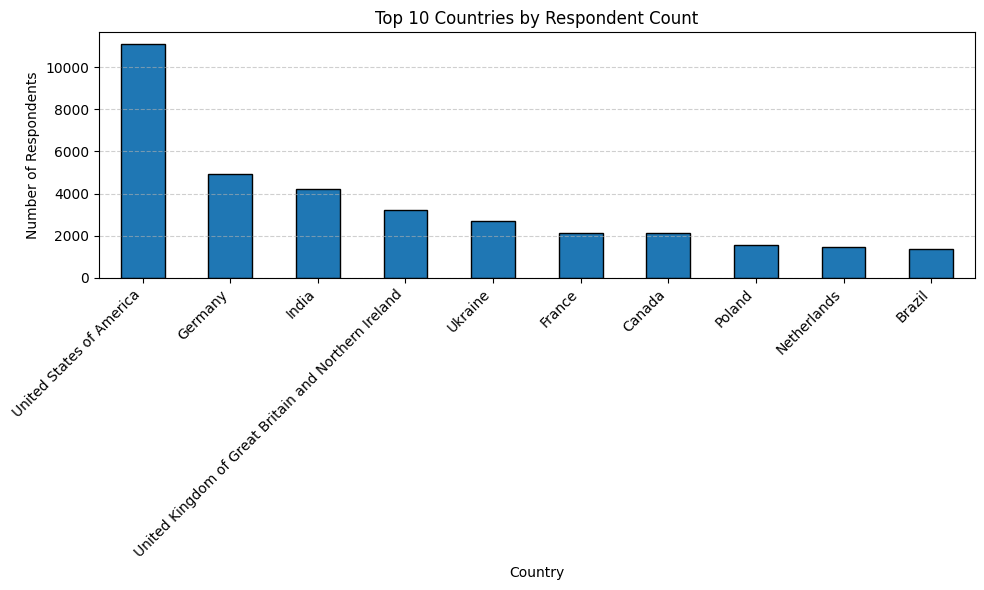

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing country values
df_country = df.dropna(subset=['Country'])

# Step 2: Count respondents per country
country_counts = df_country['Country'].value_counts().head(10)  # Top 10 for clarity

# Step 3: Plot bar chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='#1f77b4', edgecolor='black')

plt.title('Top 10 Countries by Respondent Count')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
